# Ensamble Methods: Random Forest and Extra Trees with AdaBoost

https://quantdare.com/what-is-the-difference-between-extra-trees-and-random-forest/
Random Forest and Extra Trees are two ensemple methods with some main differences:
- "Random forest uses bootstrap replicas, that is to say, it subsamples the input data with replacement, whereas Extra Trees use the whole original sample. In the Extra Trees sklearn implementation there is an optional parameter that allows users to bootstrap replicas, but by default, it uses the entire input sample. This may increase variance because bootstrapping makes it more diversified."
- "Another difference is the selection of cut points in order to split nodes. Random Forest chooses the optimum split while Extra Trees chooses it randomly. However, once the split points are selected, the two algorithms choose the best one between all the subset of features. Therefore, Extra Trees adds randomization but still has optimization."



In [1]:
## # Load libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
# retrieve variables
%store -r raw_data
%store -r raw_data_uncorr

In [3]:
## divide train test tentative with stratification to keep the distribution
## raw_data parames [28] / raw_data_uncorr [24]
X = raw_data_uncorr.iloc[:,:24]
Y = raw_data_uncorr.iloc[:,24]

X_train, X_test, y_train, y_test = train_test_split(X,Y,
                                                   test_size=0.35,
                                                   stratify=Y)

Scaling not needed for Random Forest and Extra Trees.

In [4]:
## try Random Forest with default parameters
rnf_clf = RandomForestClassifier(n_jobs=-1)
rnf_score = cross_val_score(rnf_clf, X_train, y_train, cv=20, n_jobs=-1)
'Accuracy media: {:0.3f}'.format(np.mean(rnf_score))

'Accuracy media: 0.606'

In [5]:
## try Extra Trees with default parameters
et_clf = ExtraTreesClassifier(n_jobs=-1)
et_score = cross_val_score(et_clf, X_train, y_train, cv=20,n_jobs=-1)
'Accuracy media: {:0.3f}'.format(np.mean(et_score))

'Accuracy media: 0.634'

In [6]:
## parameters tuning Random Forest

param_grid = [
    {'max_features': [8,10,'auto'],
     'max_depth':[2,5,8,None],
     'n_estimators':[10,20,50,100,150]
    }
]

grid_search = GridSearchCV(estimator=rnf_clf,
                           param_grid = param_grid,
                           cv = 3,
                           n_jobs=-1
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid=[{'max_depth': [2, 5, 8, None],
                          'max_features': [8, 10, 'auto'],
                          'n_estimators': [10, 20, 50, 100, 150]}])

In [7]:
grid_search.best_params_

{'max_depth': None, 'max_features': 8, 'n_estimators': 150}

In [8]:
grid_search.best_score_

0.6030750412470842

In [9]:
print('Best: {}'.format(grid_search.best_score_))
grid_search.best_estimator_

Best: 0.6030750412470842


RandomForestClassifier(max_features=8, n_estimators=150, n_jobs=-1)

In [10]:
results = grid_search.cv_results_

In [11]:
results = pd.DataFrame(results)[['mean_test_score','params']]
results.sort_values(by='mean_test_score',ascending=False)

,mean_test_score,params
49,0.603075,"{'max_depth': None, 'max_features': 8, 'n_esti..."
58,0.596881,"{'max_depth': None, 'max_features': 'auto', 'n..."
53,0.593830,"{'max_depth': None, 'max_features': 10, 'n_est..."
52,0.590779,"{'max_depth': None, 'max_features': 10, 'n_est..."
38,0.590772,"{'max_depth': 8, 'max_features': 10, 'n_estima..."
54,0.589236,"{'max_depth': None, 'max_features': 10, 'n_est..."
39,0.586164,"{'max_depth': 8, 'max_features': 10, 'n_estima..."
44,0.584613,"{'max_depth': 8, 'max_features': 'auto', 'n_es..."
59,0.580005,"{'max_depth': None, 'max_features': 'auto', 'n..."
34,0.576912,"{'max_depth': 8, 'max_features': 8, 'n_estimat..."


In [12]:
## parameters tuning Extra Tree

param_grid = [
    {'max_features': [8,10,'auto'],
     'max_depth':[2,5,8,None],
     'n_estimators':[10,20,50,100,150]
    }
]

grid_search = GridSearchCV(estimator=et_clf,
                           param_grid = param_grid,
                           cv = 10,
                           n_jobs=-1
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=ExtraTreesClassifier(n_jobs=-1), n_jobs=-1,
             param_grid=[{'max_depth': [2, 5, 8, None],
                          'max_features': [8, 10, 'auto'],
                          'n_estimators': [10, 20, 50, 100, 150]}])

In [13]:
grid_search.best_params_

{'max_depth': None, 'max_features': 10, 'n_estimators': 150}

In [14]:
grid_search.best_score_

0.6415384615384616

In [15]:
results = grid_search.cv_results_

In [16]:
results = pd.DataFrame(results)[['mean_test_score','params']]
results.sort_values(by='mean_test_score',ascending=False)

,mean_test_score,params
54,0.641538,"{'max_depth': None, 'max_features': 10, 'n_est..."
49,0.635385,"{'max_depth': None, 'max_features': 8, 'n_esti..."
58,0.635385,"{'max_depth': None, 'max_features': 'auto', 'n..."
48,0.633846,"{'max_depth': None, 'max_features': 8, 'n_esti..."
52,0.633846,"{'max_depth': None, 'max_features': 10, 'n_est..."
53,0.629231,"{'max_depth': None, 'max_features': 10, 'n_est..."
59,0.626154,"{'max_depth': None, 'max_features': 'auto', 'n..."
47,0.610769,"{'max_depth': None, 'max_features': 8, 'n_esti..."
57,0.610769,"{'max_depth': None, 'max_features': 'auto', 'n..."
32,0.606154,"{'max_depth': 8, 'max_features': 8, 'n_estimat..."


In [17]:
## initialize Random Forest and test with best found parameters
rnf_clf = RandomForestClassifier(n_estimators=150, n_jobs=-1, max_features=8)
rnf_score = cross_val_score(rnf_clf, X_train, y_train, cv=20, n_jobs=-1)
'Accuracy media: {:0.3f}'.format(np.mean(rnf_score))

'Accuracy media: 0.614'

In [18]:
## initialize Extra Trees and test with best found parameters
et_clf = ExtraTreesClassifier(n_estimators=150, n_jobs=-1, max_features=8)
et_score = cross_val_score(et_clf, X_train, y_train, cv=20,n_jobs=-1)
'Accuracy media: {:0.3f}'.format(np.mean(et_score))

'Accuracy media: 0.640'

[[Text(0, 0, 'RF'), Text(0, 1, 'ET')]]

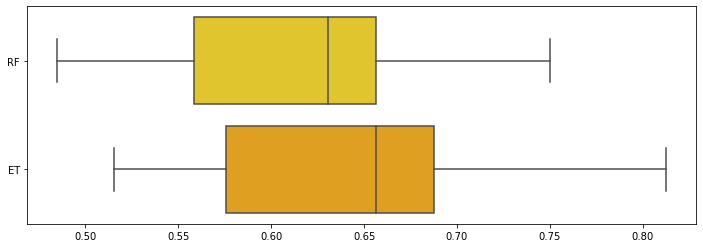

In [21]:
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot()
sn.boxplot(ax = ax,
            data = [rnf_score, et_score],
            palette = 'Wistia',
            orient = 'h'
           )
ax.set(yticklabels=['RF','ET'])

In [22]:
rnf_clf.fit(X_train,y_train)
et_clf.fit(X_train,y_train)

ExtraTreesClassifier(max_features=8, n_estimators=150, n_jobs=-1)

In [23]:
## identity the feature importance for potential dimensionality reduction
named_feat_importance = dict(zip(X_train.columns, rnf_clf.feature_importances_))
sorted(named_feat_importance.items(), key=lambda x:x[1], reverse=True)[:10]

[('chroma_stft', 0.0972636485537366),
 ('rmse', 0.07905604662935796),
 ('mfcc4', 0.07713662269061872),
 ('mfcc1', 0.059038923218993275),
 ('spectral_bandwidth', 0.05093026280716991),
 ('mfcc17', 0.04859617641275387),
 ('mfcc9', 0.047341632722416635),
 ('rolloff', 0.047019133192688745),
 ('mfcc6', 0.04207338050540098),
 ('zero_crossing_rate', 0.039020556681830465)]

In [24]:
expected = y_test
predicted = rnf_clf.predict(X_test)
rnf_cnf_matrix = confusion_matrix(expected, predicted)
rnf_score_tuned = cross_val_score(rnf_clf, X_test, y_test, cv = 20)
rf = 'RandomForest accuracy media tuned: {:0.3f}'.format(np.mean(rnf_score_tuned))
rf

'RandomForest accuracy media tuned: 0.618'

In [25]:
## Micro-averaging - In micro-averaging method, you sum up the individual true positives, false positives, 
## and false negatives of the system for different sets and the apply them. And the micro-average F1-Score
## will be simply the harmonic mean of above two equations.
f1_score(expected, predicted, average = 'micro')

0.6542857142857142

In [26]:
## In simplest of terms, Hamming-Loss is the fraction of labels that are incorrectly predicted, 
## i.e., the fraction of the wrong labels to the total number of labels.
hamming_loss(expected, predicted)

0.3457142857142857

In [27]:
rf_accuracy = accuracy_score(expected, predicted)
rf_accuracy

0.6542857142857142

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

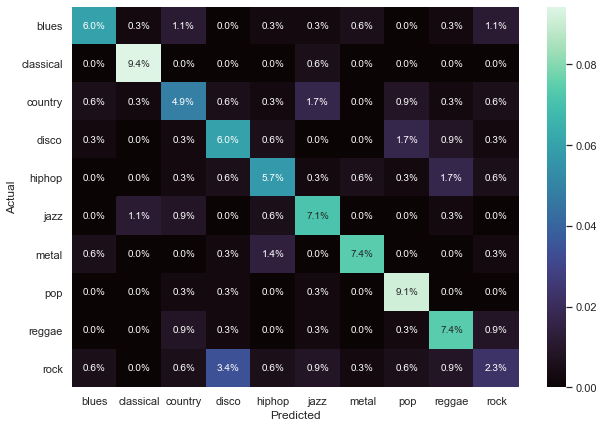

In [28]:
data = rnf_cnf_matrix
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.0)#for label size
rf_heatmap = sn.heatmap(df_cm/np.sum(data), cmap="mako", annot=True, fmt='.1%', annot_kws={"size": 10})# font size
rf_heatmap

In [29]:
expected = y_test
predicted = et_clf.predict(X_test)
et_cnf_matrix = confusion_matrix(expected, predicted)
et_score_tuned = cross_val_score(et_clf, X_test, y_test, cv = 20)
et = 'ExtraTreesClassifier accuracy media tuned: {:0.3f}'.format(np.mean(et_score_tuned))
et

'ExtraTreesClassifier accuracy media tuned: 0.640'

In [30]:
## Micro-averaging - In micro-averaging method, you sum up the individual true positives, false positives, 
## and false negatives of the system for different sets and the apply them. And the micro-average F1-Score
## will be simply the harmonic mean of above two equations.
f1_score(expected, predicted, average = 'micro')

0.6885714285714286

In [31]:
## In simplest of terms, Hamming-Loss is the fraction of labels that are incorrectly predicted, 
## i.e., the fraction of the wrong labels to the total number of labels.
hamming_loss(expected, predicted)

0.31142857142857144

In [32]:
et_accuracy = accuracy_score(expected, predicted)
et_accuracy

0.6885714285714286

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

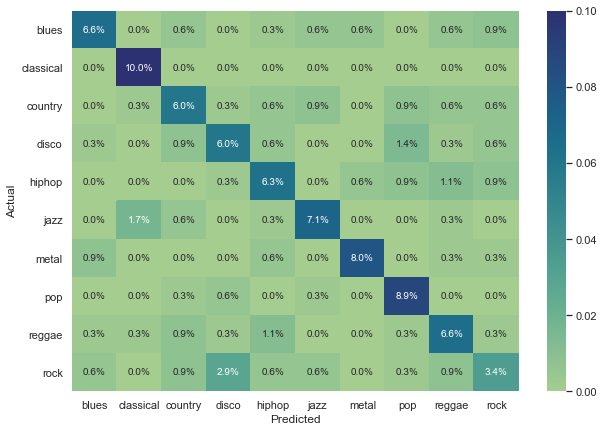

In [33]:
data = et_cnf_matrix
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.0)#for label size
et_heatmap = sn.heatmap(df_cm/np.sum(data), cmap="crest", annot=True, fmt='.1%', annot_kws={"size": 10})# font size
et_heatmap

In [37]:
ada_clf = AdaBoostClassifier(
    ExtraTreesClassifier(n_estimators=150, n_jobs=-1, max_features=8),
    algorithm='SAMME.R',
    learning_rate=0.5
)
ada_score = cross_val_score(ada_clf, X_train, y_train, cv=20, n_jobs=-1)
'Accuracy media tuned: {:0.3f}'.format(np.mean(ada_score))

'Accuracy media tuned: 0.656'

[[Text(0, 0, 'RF'), Text(0, 1, 'ET'), Text(0, 2, 'ADA')]]

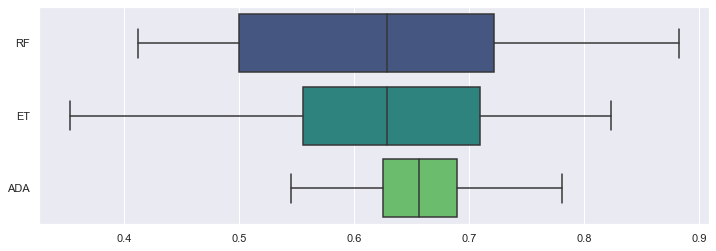

In [38]:
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot()
sn.boxplot(ax = ax,
            data = [rnf_score_tuned, et_score_tuned, ada_score],
            palette = 'viridis',
            orient = 'h'
           )
ax.set(yticklabels=['RF','ET','ADA'])

Of the three models, AdaBoost on ExtraTrees has the higher mean performance.

In [39]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=ExtraTreesClassifier(max_features=8,
                                                       n_estimators=150,
                                                       n_jobs=-1),
                   learning_rate=0.5)

In [40]:
expected = y_test
predicted = ada_clf.predict(X_test)
ada_cnf_matrix = confusion_matrix(expected, predicted)
ada_score_tuned = cross_val_score(ada_clf, X_test, y_test, cv = 20)
ada = 'AdaBoost Accuracy media tuned: {:0.3f}'.format(np.mean(ada_score_tuned))
ada

'AdaBoost Accuracy media tuned: 0.625'

In [41]:
## Micro-averaging - In micro-averaging method, you sum up the individual true positives, false positives, 
## and false negatives of the system for different sets and the apply them. And the micro-average F1-Score
## will be simply the harmonic mean of above two equations.
f1_score(expected, predicted, average = 'micro')

0.7114285714285714

In [42]:
## In simplest of terms, Hamming-Loss is the fraction of labels that are incorrectly predicted, 
## i.e., the fraction of the wrong labels to the total number of labels.
hamming_loss(expected, predicted)

0.2885714285714286

In [43]:
ada_accuracy = accuracy_score(expected, predicted)
ada_accuracy

0.7114285714285714

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

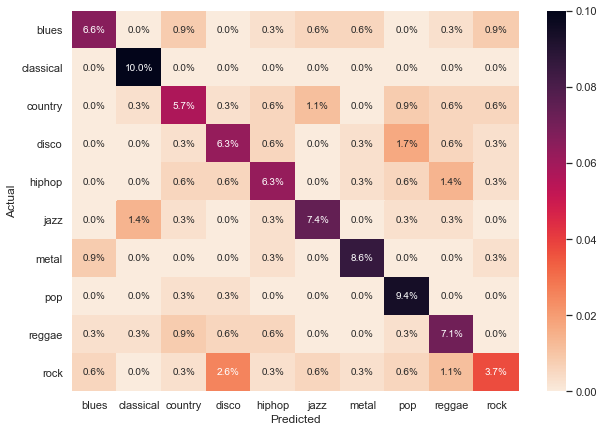

In [44]:
data = ada_cnf_matrix
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.0)#for label size
ada_heatmap = sn.heatmap(df_cm/np.sum(data), cmap="rocket_r", annot=True, fmt='.1%', annot_kws={"size": 10})# font size
ada_heatmap

In [45]:
pd.DataFrame(ada_clf.predict_proba(X_test), columns = ada_clf.classes_)

,blues,classical,country,disco,hiphop,jazz,metal,pop,reggae,rock
0,5.617169e-03,1.078995e-14,3.930963e-07,2.058762e-03,3.617331e-02,5.989672e-11,9.483321e-01,4.530143e-15,5.089683e-11,7.818252e-03
1,2.311523e-10,8.255734e-05,5.447152e-02,3.279230e-01,1.697330e-01,3.794909e-02,2.750336e-09,1.982554e-01,9.923458e-02,1.123508e-01
2,7.132409e-08,3.669691e-15,5.258720e-13,1.294328e-02,3.122727e-02,1.912048e-09,9.558294e-01,6.036881e-14,4.824696e-13,2.249864e-08
3,3.394794e-02,8.029402e-01,9.337603e-02,2.333829e-10,1.231314e-13,6.967635e-02,1.742895e-15,2.165030e-06,4.503445e-05,1.227721e-05
4,1.064332e-01,2.950410e-01,8.438821e-02,5.118569e-02,8.195984e-03,2.859145e-01,1.582778e-03,3.403235e-02,7.224307e-02,6.098317e-02
...,...,...,...,...,...,...,...,...,...,...
345,5.877945e-02,5.220326e-01,4.880468e-02,2.187221e-07,6.921634e-10,3.667634e-01,3.512517e-14,1.450628e-07,3.618480e-03,1.018338e-06
346,5.721593e-12,1.319540e-13,7.002489e-02,8.788760e-02,8.630475e-02,1.433411e-02,1.255821e-10,6.682885e-01,6.647275e-02,6.687374e-03
347,3.482143e-01,6.267804e-02,1.593589e-01,9.139584e-05,1.607896e-03,2.349985e-01,5.550980e-12,4.598348e-04,1.341041e-01,5.848706e-02
348,8.019539e-03,6.743136e-02,5.863407e-02,1.815182e-01,2.108875e-01,6.575523e-02,3.438272e-03,2.417810e-01,1.059774e-01,5.655743e-02


In [46]:
## run the model keeping the calculated most important features
data = raw_data_uncorr[['label','chroma_stft','rmse','mfcc4','mfcc1','spectral_bandwidth','mfcc17','mfcc6','zero_crossing_rate','mfcc13','rolloff']]

In [47]:
X = data.iloc[:,1:]
Y = data.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X,Y,
                                                   test_size=0.35,
                                                   stratify=Y)

In [48]:
et_score_small = cross_val_score(et_clf, X_train, y_train, cv=20,n_jobs=-1)
'Accuracy media: {:0.3f}'.format(np.mean(et_score_small))

'Accuracy media: 0.623'

In [49]:
rnf_score_small = cross_val_score(rnf_clf, X_train, y_train, cv=20, n_jobs=-1)
'Accuracy media: {:0.3f}'.format(np.mean(rnf_score_small))

'Accuracy media: 0.607'

In [50]:
ada_score_small = cross_val_score(ada_clf, X_train, y_train, cv=20, n_jobs=-1)
'Accuracy media tuned: {:0.3f}'.format(np.mean(ada_score_small))

'Accuracy media tuned: 0.620'

The model on most important features performs on average slightly less good than running the algorithms on the entire dataset.

In [52]:
%store et_accuracy
%store rf_accuracy
%store ada_accuracy
%store y_test
%store -r et_cnf_matrix 
%store -r rnf_cnf_matrix 
%store -r ada_cnf_matrix 

Stored 'et_accuracy' (float64)
Stored 'rf_accuracy' (float64)
Stored 'ada_accuracy' (float64)
Stored 'y_test' (Series)
